In [1]:
import os
import numpy as np
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel as rbf
from sklearn.metrics.pairwise import polynomial_kernel as poly
from sklearn.metrics.pairwise import linear_kernel as linear
from tqdm.auto import tqdm
import torch
import torch.autograd as autograd

import matplotlib.pylab as plt
%matplotlib inline

plt.style.use('seaborn-colorblind')
import warnings
warnings.filterwarnings('ignore')

/Users/fujisawa/.pyenv/versions/3.10.3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/49/chfdtnwd25dbjts2mpd238fw0000gn/T/ipykernel_42737/1670916127.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [2]:
def cumulative_mean(dist_list):
    cum_sum = np.cumsum(dist_list, 0)
    for i in range(len(cum_sum)):
        cum_sum[i] /= (i+1)
    return cum_sum

In [3]:
path = os.getcwd()
results_path = path + '/results/'

# Import results

In [4]:
kl_rbf_5, ksd_rbf_5, eig_rbf_5 = np.load(results_path+'kl_rbf_0.67_5.npy'), np.load(results_path+'ksd_rbf_0.67_5.npy'), np.load(results_path+'eig_rbf_0.67_5.npy')
kl_rbf_10, ksd_rbf_10, eig_rbf_10 = np.load(results_path+'kl_rbf_0.67_10.npy'), np.load(results_path+'ksd_rbf_0.67_10.npy'), np.load(results_path+'eig_rbf_0.67_10.npy')
kl_rbf_100, ksd_rbf_100, eig_rbf_100 = np.load(results_path+'kl_rbf_0.67_100.npy'), np.load(results_path+'ksd_rbf_0.67_100.npy'), np.load(results_path+'eig_rbf_0.67_100.npy')
kl_rbf_1000, ksd_rbf_1000, eig_rbf_1000 = np.load(results_path+'kl_rbf_0.67_1000.npy'), np.load(results_path+'ksd_rbf_0.67_1000.npy'), np.load(results_path+'eig_rbf_0.67_1000.npy')

cum_kl_rbf_5, cum_ksd_rbf_5 = cumulative_mean(kl_rbf_5), cumulative_mean(ksd_rbf_5)
cum_kl_rbf_10, cum_ksd_rbf_10 = cumulative_mean(kl_rbf_10), cumulative_mean(ksd_rbf_10)
cum_kl_rbf_100, cum_ksd_rbf_100 = cumulative_mean(kl_rbf_100), cumulative_mean(ksd_rbf_100)
cum_kl_rbf_1000, cum_ksd_rbf_1000 = cumulative_mean(kl_rbf_1000), cumulative_mean(ksd_rbf_1000)

# Results plot

Text(0.5, 1.0, 'KL (final step)')

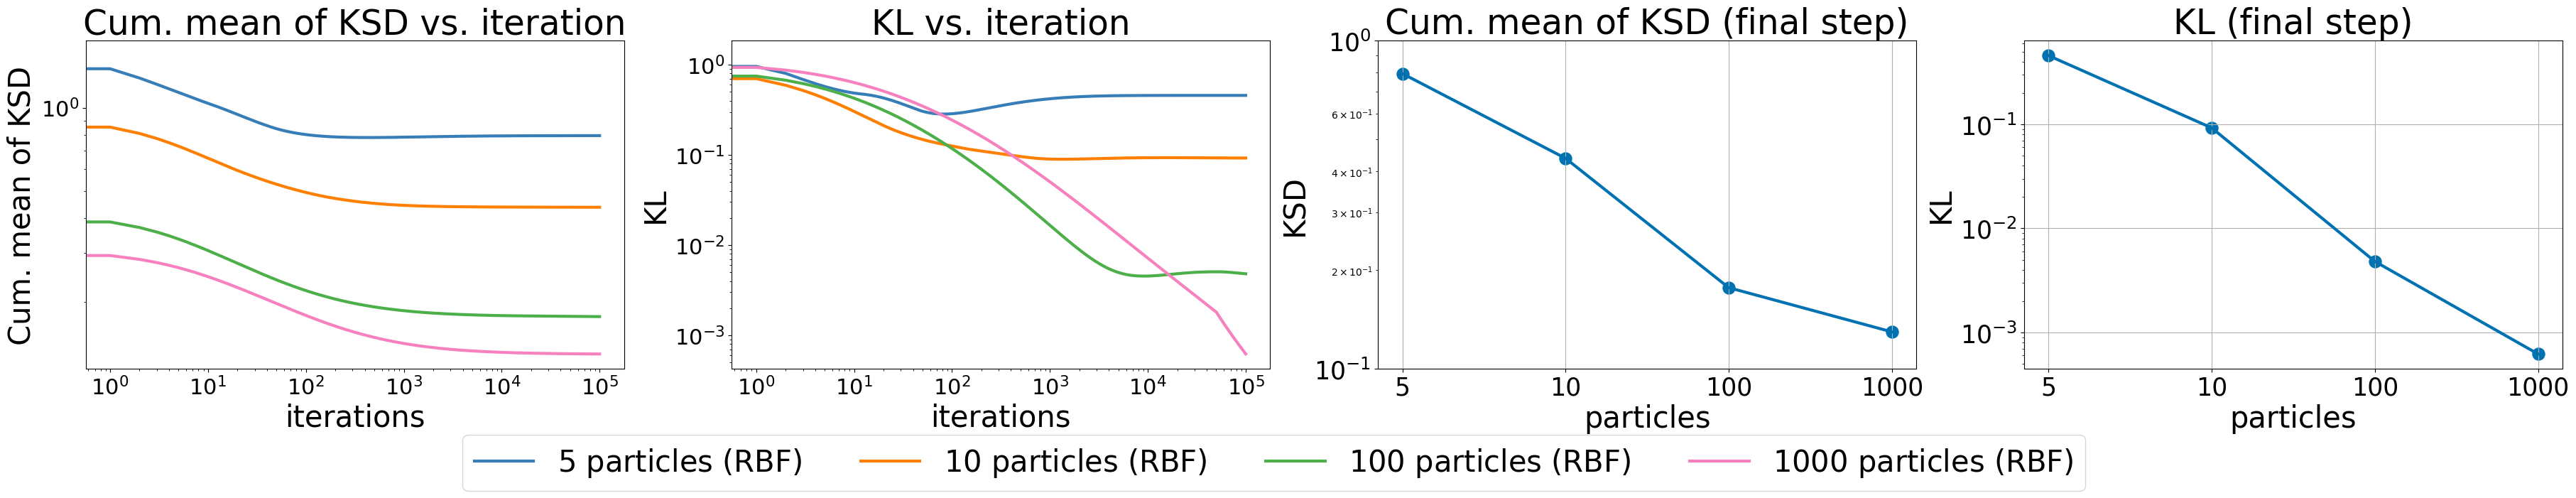

In [5]:
plt.figure(figsize=(45,6))

plt.subplot(1,4,1)
plt.plot(cum_ksd_rbf_5, label='$5$ particles (RBF)',linewidth=3,c='#377eb8')
plt.plot(cum_ksd_rbf_10, label='$10$ particles (RBF)',linewidth=3, c='#ff7f00')
plt.plot(cum_ksd_rbf_100, label='$100$ particles (RBF)',linewidth=3, c='#4daf4a')
plt.plot(cum_ksd_rbf_1000, label='$1000$ particles (RBF)',linewidth=3, c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('iterations',fontsize=30)
plt.ylabel('Cum. mean of KSD',fontsize=30)
plt.title('Cum. mean of KSD vs. iteration',fontsize=35)

plt.subplot(1,4,2)
plt.plot(kl_rbf_5, label='$5$ particles (RBF)',linewidth=3,c='#377eb8')
plt.plot(kl_rbf_10, label='$10$ particles (RBF)',linewidth=3, c='#ff7f00')
plt.plot(kl_rbf_100, label='$100$ particles (RBF)',linewidth=3, c='#4daf4a')
plt.plot(kl_rbf_1000, label='$1000$ particles (RBF)',linewidth=3, c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('iterations',fontsize=30)
plt.ylabel('KL',fontsize=30)
plt.title('KL vs. iteration',fontsize=35)
plt.legend(bbox_to_anchor=(-0.5, -0.2), loc='upper left', borderaxespad=0, fontsize=30, ncol = 4)

plt.subplot(1,4,3)
particles_list = [5, 10, 100, 1000]
ksd_rbf = [cum_ksd_rbf_5[-1], cum_ksd_rbf_10[-1], cum_ksd_rbf_100[-1], cum_ksd_rbf_1000[-1]]

x = range(len(particles_list))
plt.scatter(x, ksd_rbf, s=150, label='Final KSD w./ RBF')
plt.plot(x, ksd_rbf, linewidth=3)
plt.xticks(x, particles_list)
plt.grid(True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('particles',fontsize=30)
plt.yscale('log')
plt.ylabel('KSD',fontsize=30)
#plt.legend(fontsize=22)
plt.ylim([10**-1, 10**0])
plt.title('Cum. mean of KSD (final step)',fontsize=35)

plt.subplot(1,4,4)
kl_rbf = [kl_rbf_5[-1], kl_rbf_10[-1], kl_rbf_100[-1], kl_rbf_1000[-1]]

x = range(len(particles_list))
plt.scatter(x, kl_rbf, s=150, label='RBF')
plt.plot(x, kl_rbf, linewidth=3)
plt.xticks(x, particles_list)
plt.grid(True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('particles',fontsize=30)
plt.yscale('log')
plt.ylabel('KL',fontsize=30)
#plt.legend(fontsize=30)
plt.title('KL (final step)',fontsize=35)

## Experiments on various stepsize decay

In [7]:
kl_rbf_5, ksd_rbf_5, eig_rbf_5 = np.load(results_path+'kl_rbf_1.0_5.npy'), np.load(results_path+'ksd_rbf_1.0_5.npy'), np.load(results_path+'eig_rbf_1.0_5.npy')
kl_rbf_67_5, ksd_rbf_67_5, eig_rbf_67_5 = np.load(results_path+'kl_rbf_0.67_5.npy'), np.load(results_path+'ksd_rbf_0.67_5.npy'), np.load(results_path+'eig_rbf_0.67_5.npy')
kl_rbf_sqrt_5, ksd_rbf_sqrt_5, eig_rbf_sqrt_5 = np.load(results_path+'kl_rbf_0.5_5.npy'), np.load(results_path+'ksd_rbf_0.5_5.npy'), np.load(results_path+'eig_rbf_0.5_5.npy')
kl_rbf_0_5, ksd_rbf_0_5, eig_rbf_0_5 = np.load(results_path+'kl_rbf_0.0_5.npy'), np.load(results_path+'ksd_rbf_0.0_5.npy'), np.load(results_path+'eig_rbf_0.0_5.npy')

cum_kl_rbf_5, cum_ksd_rbf_5 = cumulative_mean(kl_rbf_5), cumulative_mean(ksd_rbf_5)
cum_kl_rbf_67_5, cum_ksd_rbf_67_5 = cumulative_mean(kl_rbf_67_5), cumulative_mean(ksd_rbf_67_5)
cum_kl_rbf_sqrt_5, cum_ksd_rbf_sqrt_5 = cumulative_mean(kl_rbf_sqrt_5), cumulative_mean(ksd_rbf_sqrt_5)
cum_kl_rbf_0_5, cum_ksd_rbf_0_5 = cumulative_mean(kl_rbf_0_5), cumulative_mean(ksd_rbf_0_5)

In [8]:
kl_rbf_10, ksd_rbf_10, eig_rbf_10 = np.load(results_path+'kl_rbf_1.0_10.npy'), np.load(results_path+'ksd_rbf_1.0_10.npy'), np.load(results_path+'eig_rbf_1.0_10.npy')
kl_rbf_67_10, ksd_rbf_67_10, eig_rbf_67_10 = np.load(results_path+'kl_rbf_0.67_10.npy'), np.load(results_path+'ksd_rbf_0.67_10.npy'), np.load(results_path+'eig_rbf_0.67_10.npy')
kl_rbf_sqrt_10, ksd_rbf_sqrt_10, eig_rbf_sqrt_10 = np.load(results_path+'kl_rbf_0.5_10.npy'), np.load(results_path+'ksd_rbf_0.5_10.npy'), np.load(results_path+'eig_rbf_0.5_10.npy')
kl_rbf_0_10, ksd_rbf_0_10, eig_rbf_0_10 = np.load(results_path+'kl_rbf_0.0_10.npy'), np.load(results_path+'ksd_rbf_0.0_10.npy'), np.load(results_path+'eig_rbf_0.0_10.npy')

cum_kl_rbf_10, cum_ksd_rbf_10 = cumulative_mean(kl_rbf_10), cumulative_mean(ksd_rbf_10)
cum_kl_rbf_67_10, cum_ksd_rbf_67_10 = cumulative_mean(kl_rbf_67_10), cumulative_mean(ksd_rbf_67_10)
cum_kl_rbf_sqrt_10, cum_ksd_rbf_sqrt_10 = cumulative_mean(kl_rbf_sqrt_10), cumulative_mean(ksd_rbf_sqrt_10)
cum_kl_rbf_0_10, cum_ksd_rbf_0_10 = cumulative_mean(kl_rbf_0_10), cumulative_mean(ksd_rbf_0_10)

In [9]:
kl_rbf_100, ksd_rbf_100, eig_rbf_100 = np.load(results_path+'kl_rbf_1.0_100.npy'), np.load(results_path+'ksd_rbf_1.0_100.npy'), np.load(results_path+'eig_rbf_1.0_100.npy')
kl_rbf_67_100, ksd_rbf_67_100, eig_rbf_67_100 = np.load(results_path+'kl_rbf_0.67_100.npy'), np.load(results_path+'ksd_rbf_0.67_100.npy'), np.load(results_path+'eig_rbf_0.67_100.npy')
kl_rbf_sqrt_100, ksd_rbf_sqrt_100, eig_rbf_sqrt_100 = np.load(results_path+'kl_rbf_0.5_100.npy'), np.load(results_path+'ksd_rbf_0.5_100.npy'), np.load(results_path+'eig_rbf_0.5_100.npy')
kl_rbf_0_100, ksd_rbf_0_100, eig_rbf_0_100 = np.load(results_path+'kl_rbf_0.0_100.npy'), np.load(results_path+'ksd_rbf_0.0_100.npy'), np.load(results_path+'eig_rbf_0.0_100.npy')

cum_kl_rbf_100, cum_ksd_rbf_100 = cumulative_mean(kl_rbf_100), cumulative_mean(ksd_rbf_100)
cum_kl_rbf_67_100, cum_ksd_rbf_67_100 = cumulative_mean(kl_rbf_67_100), cumulative_mean(ksd_rbf_67_100)
cum_kl_rbf_sqrt_100, cum_ksd_rbf_sqrt_100 = cumulative_mean(kl_rbf_sqrt_100), cumulative_mean(ksd_rbf_sqrt_100)
cum_kl_rbf_0_100, cum_ksd_rbf_0_100 = cumulative_mean(kl_rbf_0_100), cumulative_mean(ksd_rbf_0_100)

In [10]:
kl_rbf_1000, ksd_rbf_1000, eig_rbf_1000 = np.load(results_path+'kl_rbf_1.0_1000.npy'), np.load(results_path+'ksd_rbf_1.0_1000.npy'), np.load(results_path+'eig_rbf_1.0_1000.npy')
kl_rbf_67_1000, ksd_rbf_67_1000, eig_rbf_67_1000 = np.load(results_path+'kl_rbf_0.67_1000.npy'), np.load(results_path+'ksd_rbf_0.67_1000.npy'), np.load(results_path+'eig_rbf_0.67_1000.npy')
kl_rbf_sqrt_1000, ksd_rbf_sqrt_1000, eig_rbf_sqrt_1000 = np.load(results_path+'kl_rbf_0.5_1000.npy'), np.load(results_path+'ksd_rbf_0.5_1000.npy'), np.load(results_path+'eig_rbf_0.5_1000.npy')
kl_rbf_0_1000, ksd_rbf_0_1000, eig_rbf_0_1000 = np.load(results_path+'kl_rbf_0.0_1000.npy'), np.load(results_path+'ksd_rbf_0.0_1000.npy'), np.load(results_path+'eig_rbf_0.0_1000.npy')

cum_kl_rbf_1000, cum_ksd_rbf_1000 = cumulative_mean(kl_rbf_1000), cumulative_mean(ksd_rbf_1000)
cum_kl_rbf_67_1000, cum_ksd_rbf_67_1000 = cumulative_mean(kl_rbf_67_1000), cumulative_mean(ksd_rbf_67_1000)
cum_kl_rbf_sqrt_1000, cum_ksd_rbf_sqrt_1000 = cumulative_mean(kl_rbf_sqrt_1000), cumulative_mean(ksd_rbf_sqrt_1000)
cum_kl_rbf_0_1000, cum_ksd_rbf_0_1000 = cumulative_mean(kl_rbf_0_1000), cumulative_mean(ksd_rbf_0_1000)

Text(0.5, 0, 'iterations')

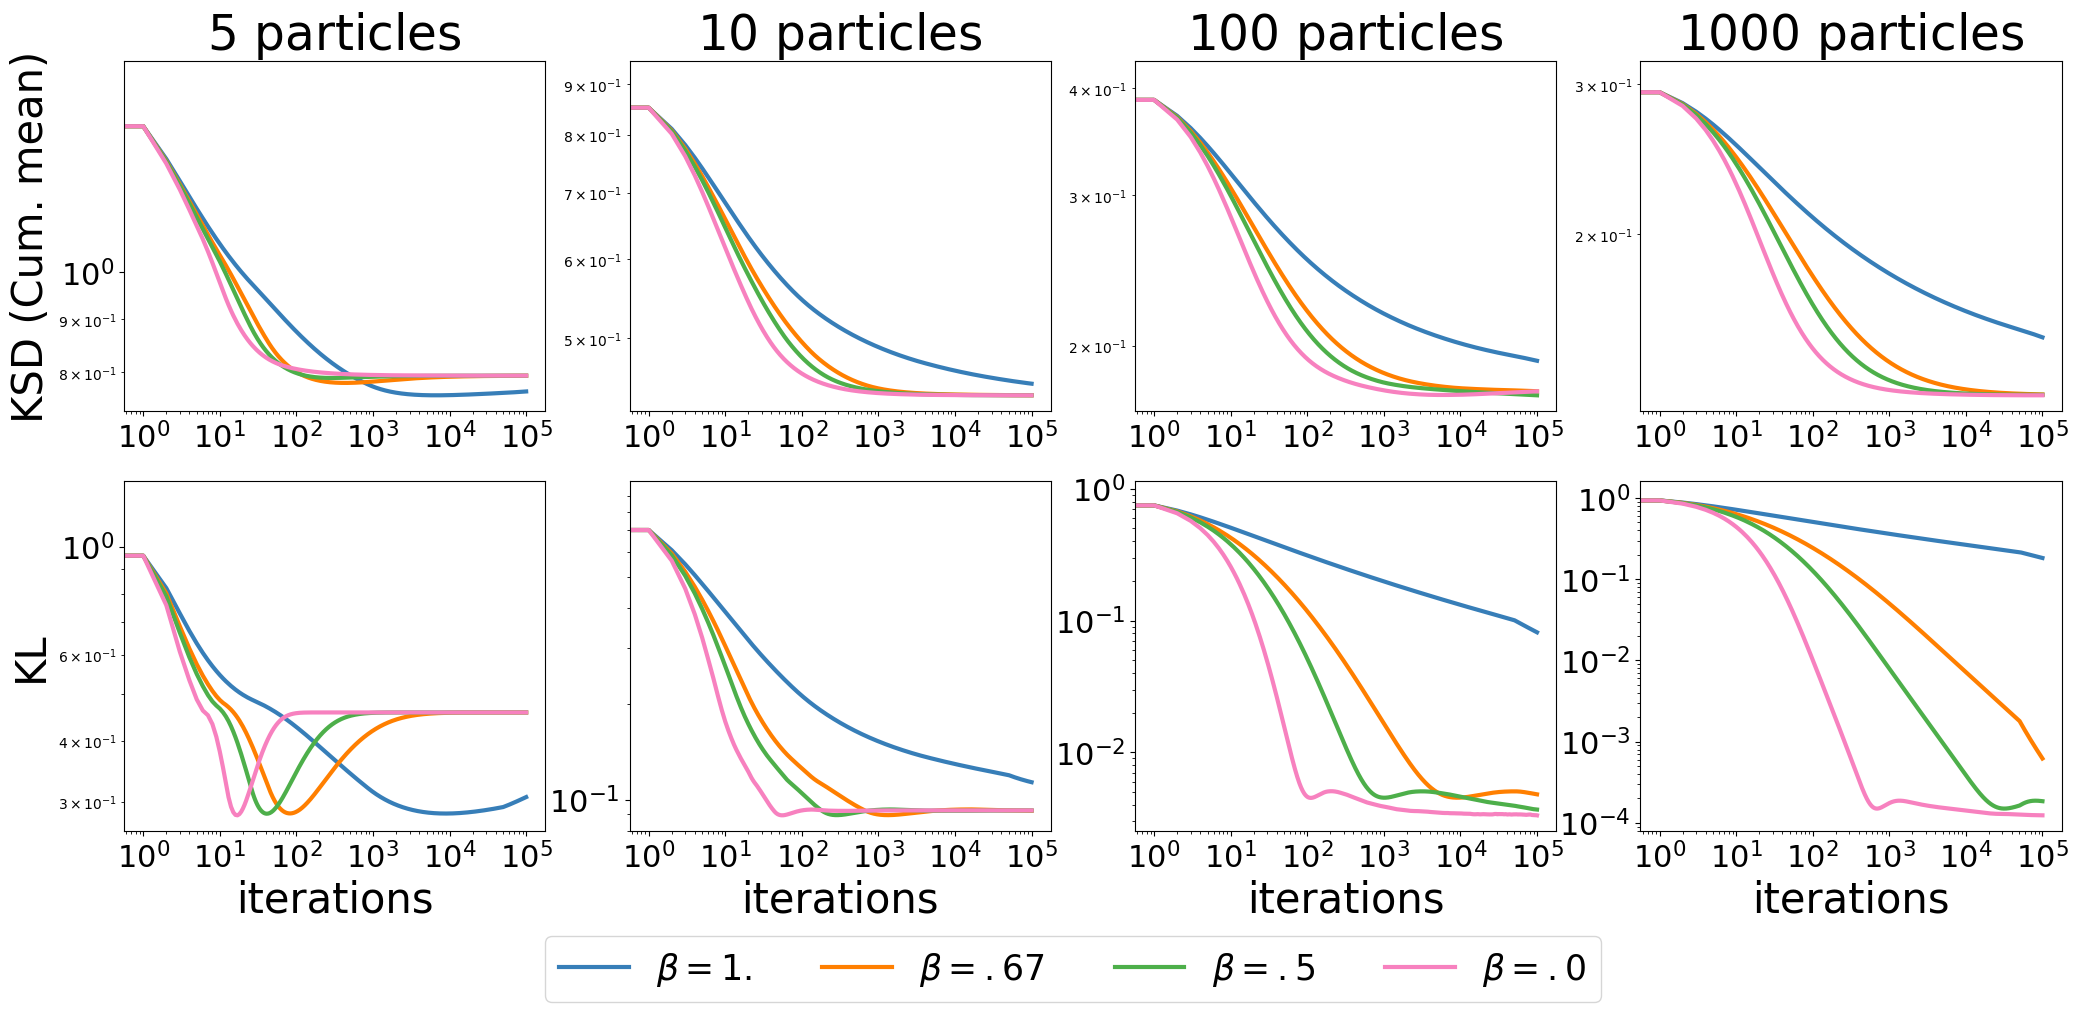

In [11]:
plt.figure(figsize=(25,10))

plt.subplot(2,4,1)
plt.plot(cum_ksd_rbf_5, label=r'$\beta=1.$',linewidth=3,c='#377eb8')
plt.plot(cum_ksd_rbf_67_5, label=r'$\beta=.67$',linewidth=3,c='#ff7f00')
plt.plot(cum_ksd_rbf_sqrt_5, label=r'$\beta=.5$',linewidth=3,c='#4daf4a')
plt.plot(cum_ksd_rbf_0_5, label=r'$\beta=.0$',linewidth=3,c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel('KSD (Cum. mean)',fontsize=30)
plt.title('$5$ particles',fontsize=35)
plt.legend(bbox_to_anchor=(1, -1.5), loc='upper left', borderaxespad=0, fontsize=25, ncol = 4)

plt.subplot(2,4,2)
plt.plot(cum_ksd_rbf_10, label='$\beta=1.$',linewidth=3,c='#377eb8')
plt.plot(cum_ksd_rbf_67_10, label='$\beta=.75$',linewidth=3,c='#ff7f00')
plt.plot(cum_ksd_rbf_sqrt_10, label='$\beta=.5$',linewidth=3,c='#4daf4a')
plt.plot(cum_ksd_rbf_0_10, label='$\beta=.25$',linewidth=3,c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('$10$ particles',fontsize=35)


plt.subplot(2,4,3)
plt.plot(cum_ksd_rbf_100, label='$\beta=1.$',linewidth=3,c='#377eb8')
plt.plot(cum_ksd_rbf_67_100, label='$\beta=.75$',linewidth=3,c='#ff7f00')
plt.plot(cum_ksd_rbf_sqrt_100, label='$\beta=.5$',linewidth=3,c='#4daf4a')
plt.plot(cum_ksd_rbf_0_100, label='$\beta=.25$',linewidth=3,c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('$100$ particles',fontsize=35)

plt.subplot(2,4,4)
plt.plot(cum_ksd_rbf_1000, label='$\beta=1.$',linewidth=3,c='#377eb8')
plt.plot(cum_ksd_rbf_67_1000, label='$\beta=.75$',linewidth=3,c='#ff7f00')
plt.plot(cum_ksd_rbf_sqrt_1000, label='$\beta=.5$',linewidth=3,c='#4daf4a')
plt.plot(cum_ksd_rbf_0_1000, label='$\beta=.25$',linewidth=3,c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('$1000$ particles',fontsize=35)

plt.subplot(2,4,5)
plt.plot(kl_rbf_5, label='$\beta=1.$',linewidth=3,c='#377eb8')
plt.plot(kl_rbf_67_5, label='$\beta=.75$',linewidth=3,c='#ff7f00')
plt.plot(kl_rbf_sqrt_5, label='$\beta=.5$',linewidth=3,c='#4daf4a')
plt.plot(kl_rbf_0_5, label='$\beta=.25$',linewidth=3,c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('iterations',fontsize=30)
plt.ylabel('KL',fontsize=30)

plt.subplot(2,4,6)
plt.plot(kl_rbf_10, label='$\beta=1.$',linewidth=3,c='#377eb8')
plt.plot(kl_rbf_67_10, label='$\beta=.75$',linewidth=3,c='#ff7f00')
plt.plot(kl_rbf_sqrt_10, label='$\beta=.5$',linewidth=3,c='#4daf4a')
plt.plot(kl_rbf_0_10, label='$\beta=.25$',linewidth=3,c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('iterations',fontsize=30)


plt.subplot(2,4,7)
plt.plot(kl_rbf_100, label='$\beta=1.$',linewidth=3,c='#377eb8')
plt.plot(kl_rbf_67_100, label='$\beta=.75$',linewidth=3,c='#ff7f00')
plt.plot(kl_rbf_sqrt_100, label='$\beta=.5$',linewidth=3,c='#4daf4a')
plt.plot(kl_rbf_0_100, label='$\beta=.25$',linewidth=3,c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('iterations',fontsize=30)

plt.subplot(2,4,8)
plt.plot(kl_rbf_1000, label='$\beta=1.$',linewidth=3,c='#377eb8')
plt.plot(kl_rbf_67_1000, label='$\beta=.75$',linewidth=3,c='#ff7f00')
plt.plot(kl_rbf_sqrt_1000, label='$\beta=.5$',linewidth=3,c='#4daf4a')
plt.plot(kl_rbf_0_1000, label='$\beta=.25$',linewidth=3,c='#f781bf')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('iterations',fontsize=30)

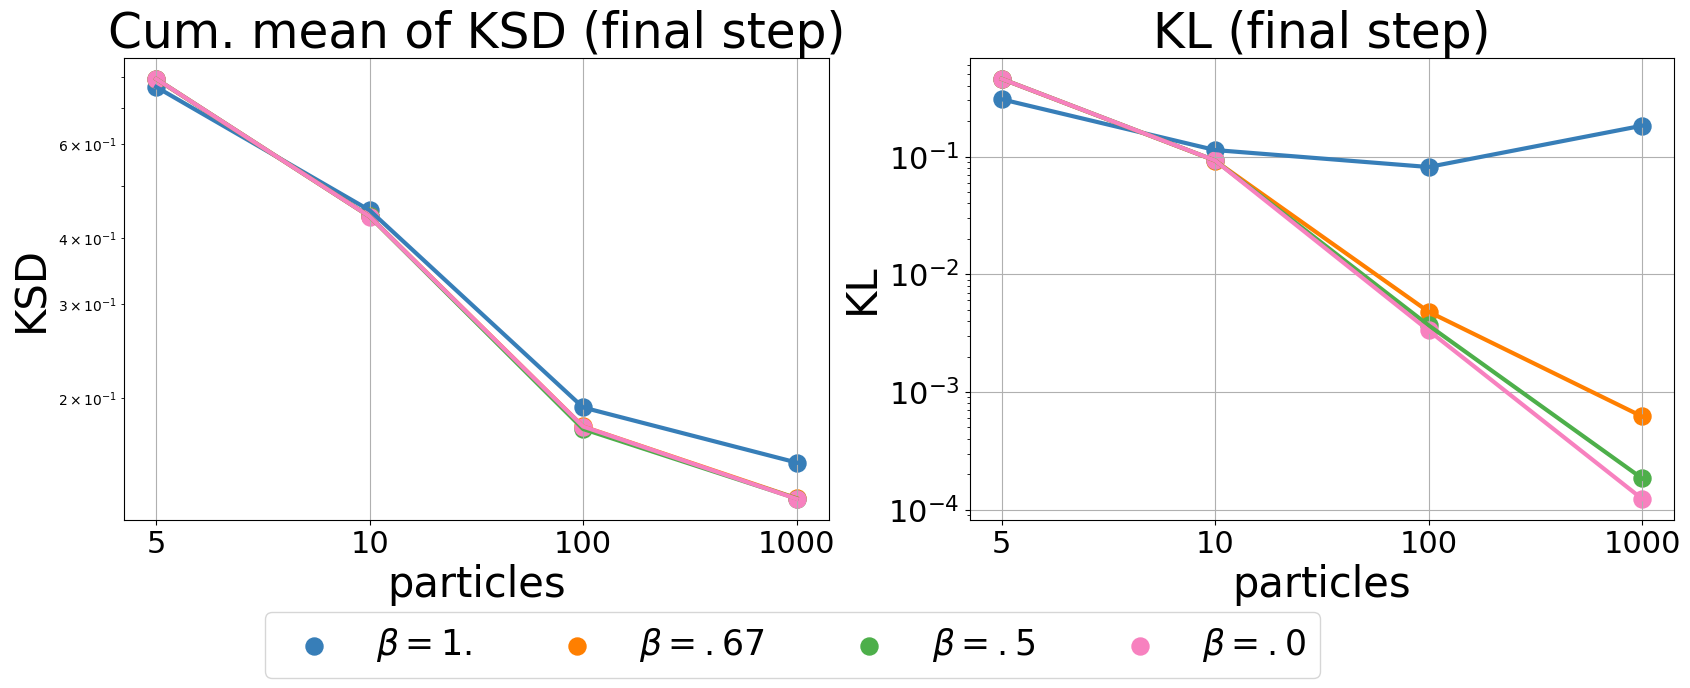

In [12]:
plt.figure(figsize=(20,6))
particles_list = [5, 10, 100, 1000]

plt.subplot(1,2,1)
ksd_rbf_1 = [cum_ksd_rbf_5[-1], cum_ksd_rbf_10[-1], cum_ksd_rbf_100[-1], cum_ksd_rbf_1000[-1]]
ksd_rbf_67 = [cum_ksd_rbf_67_5[-1], cum_ksd_rbf_67_10[-1], cum_ksd_rbf_67_100[-1], cum_ksd_rbf_67_1000[-1]]
ksd_rbf_sqrt = [cum_ksd_rbf_sqrt_5[-1], cum_ksd_rbf_sqrt_10[-1], cum_ksd_rbf_sqrt_100[-1],cum_ksd_rbf_sqrt_1000[-1]]
ksd_rbf_0 = [cum_ksd_rbf_0_5[-1], cum_ksd_rbf_0_10[-1], cum_ksd_rbf_0_100[-1], cum_ksd_rbf_0_1000[-1]]

x = range(len(particles_list))
plt.scatter(x, ksd_rbf_1, s=150, label='Final KSD w./ RBF',c='#377eb8')
plt.plot(x, ksd_rbf_1, linewidth=3,c='#377eb8')
plt.scatter(x, ksd_rbf_67, s=150, label='Final KSD w./ linear',c='#ff7f00')
plt.plot(x, ksd_rbf_67, linewidth=3,c='#ff7f00')
plt.scatter(x, ksd_rbf_sqrt, s=150, label='Final KSD w./ linear',c='#4daf4a')
plt.plot(x, ksd_rbf_sqrt, linewidth=3,c='#4daf4a')
plt.scatter(x, ksd_rbf_0, s=150, label='Final KSD w./ linear',c='#f781bf')
plt.plot(x, ksd_rbf_0, linewidth=3,c='#f781bf')
plt.xticks(x, particles_list)
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('particles',fontsize=30)
plt.yscale('log')
plt.ylabel('KSD',fontsize=30)
#plt.legend(fontsize=22)
plt.title('Cum. mean of KSD (final step)',fontsize=35)

plt.subplot(1,2,2)

kl_rbf_1 = [kl_rbf_5[-1], kl_rbf_10[-1], kl_rbf_100[-1], kl_rbf_1000[-1]]
kl_rbf_67 = [kl_rbf_67_5[-1], kl_rbf_67_10[-1], kl_rbf_67_100[-1], kl_rbf_67_1000[-1]]
kl_rbf_sqrt = [kl_rbf_sqrt_5[-1], kl_rbf_sqrt_10[-1], kl_rbf_sqrt_100[-1], kl_rbf_sqrt_1000[-1]]
kl_rbf_0 = [kl_rbf_0_5[-1], kl_rbf_0_10[-1], kl_rbf_0_100[-1], kl_rbf_0_1000[-1]]

x = range(len(particles_list))
plt.scatter(x, kl_rbf_1, s=150, label=r'$\beta=1.$',c='#377eb8')
plt.plot(x, kl_rbf_1, linewidth=3,c='#377eb8')
plt.scatter(x, kl_rbf_67, s=150, label=r'$\beta=.67$',c='#ff7f00')
plt.plot(x, kl_rbf_67, linewidth=3,c='#ff7f00')
plt.scatter(x, kl_rbf_sqrt, s=150, label=r'$\beta=.5$',c='#4daf4a')
plt.plot(x, kl_rbf_sqrt, linewidth=3,c='#4daf4a')
plt.scatter(x, kl_rbf_0, s=150, label=r'$\beta=.0$',c='#f781bf')
plt.plot(x, kl_rbf_0, linewidth=3,c='#f781bf')
plt.xticks(x, particles_list)
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('particles',fontsize=30)
plt.yscale('log')
plt.ylabel('KL',fontsize=30)
#plt.legend(fontsize=22)
plt.title('KL (final step)',fontsize=35)
plt.legend(bbox_to_anchor=(-1, -0.2), loc='upper left', borderaxespad=0, fontsize=25, ncol = 4)

# Eigenvalues

In [13]:
kl_rbf_5, ksd_rbf_5, eig_rbf_5 = np.load(results_path+'kl_rbf_0.67_5.npy'), np.load(results_path+'ksd_rbf_0.67_5.npy'), np.load(results_path+'eig_rbf_0.67_5.npy')
kl_rbf_10, ksd_rbf_10, eig_rbf_10 = np.load(results_path+'kl_rbf_0.67_10.npy'), np.load(results_path+'ksd_rbf_0.67_10.npy'), np.load(results_path+'eig_rbf_0.67_10.npy')
kl_rbf_100, ksd_rbf_100, eig_rbf_100 = np.load(results_path+'kl_rbf_0.67_100.npy'), np.load(results_path+'ksd_rbf_0.67_100.npy'), np.load(results_path+'eig_rbf_0.67_100.npy')
kl_rbf_1000, ksd_rbf_1000, eig_rbf_1000 = np.load(results_path+'kl_rbf_0.67_1000.npy'), np.load(results_path+'ksd_rbf_0.67_1000.npy'), np.load(results_path+'eig_rbf_0.67_1000.npy')

cum_kl_rbf_5, cum_ksd_rbf_5 = cumulative_mean(kl_rbf_5), cumulative_mean(ksd_rbf_5)
cum_kl_rbf_10, cum_ksd_rbf_10 = cumulative_mean(kl_rbf_10), cumulative_mean(ksd_rbf_10)
cum_kl_rbf_100, cum_ksd_rbf_100 = cumulative_mean(kl_rbf_100), cumulative_mean(ksd_rbf_100)
cum_kl_rbf_1000, cum_ksd_rbf_1000 = cumulative_mean(kl_rbf_1000), cumulative_mean(ksd_rbf_1000)

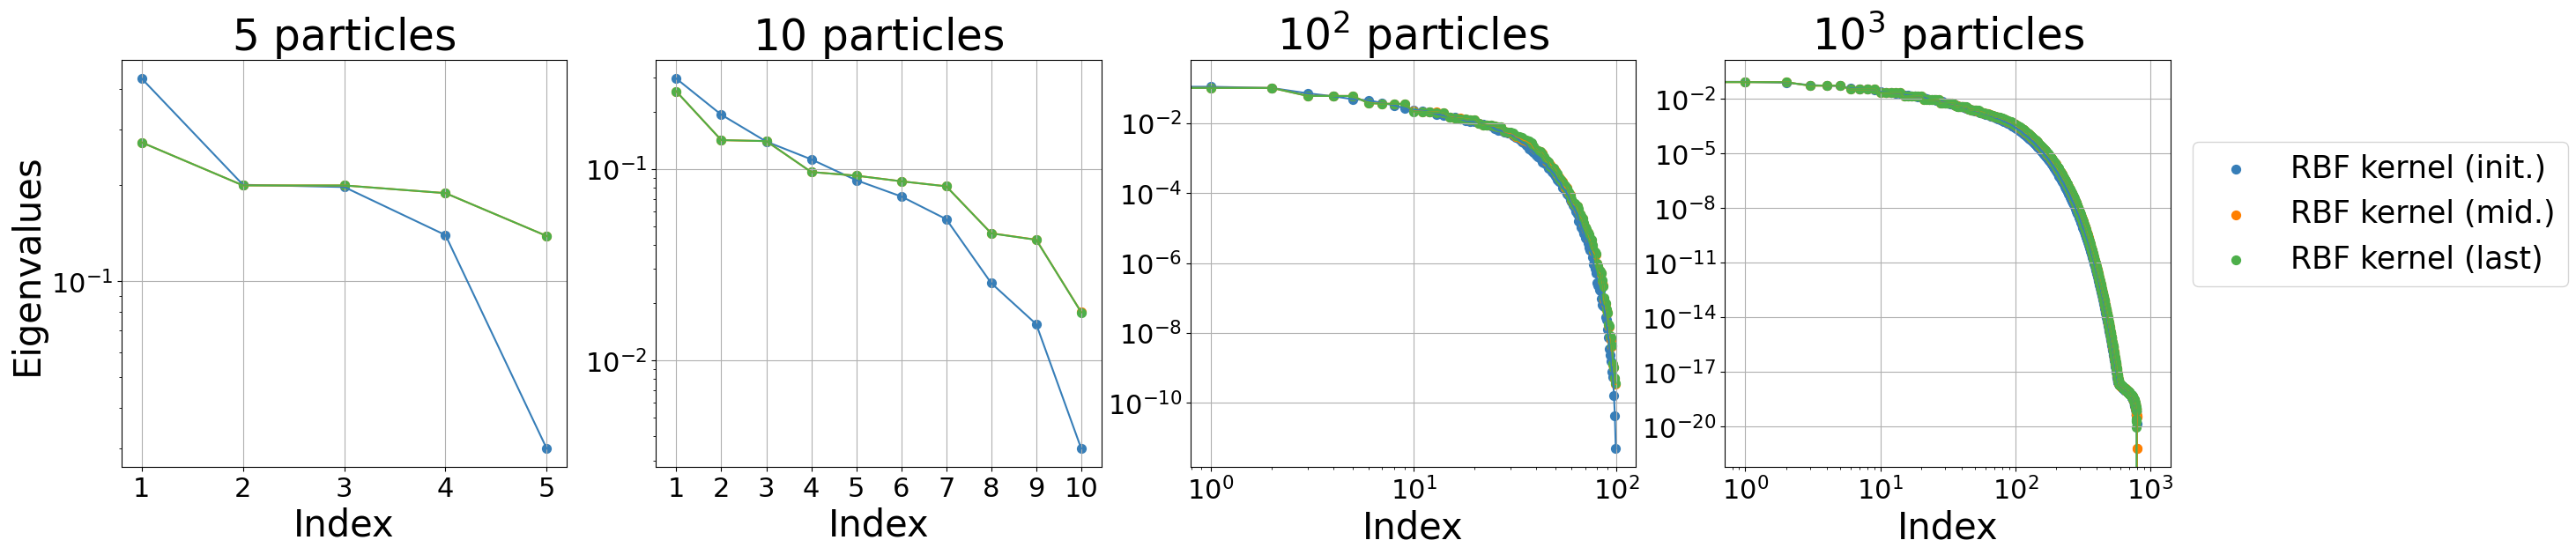

In [14]:
plt.figure(figsize=(30,6))

plt.subplot(1,4,1)
particles_list = np.arange(1,6,1)
x = range(len(particles_list))
p = eig_rbf_5[0].shape

plt.scatter(x, eig_rbf_5[0]/p, s=50, c='#377eb8')
plt.plot(x, eig_rbf_5[0]/p, c='#377eb8')
plt.scatter(x, eig_rbf_5[1]/p, s=50, c='#ff7f00')
plt.plot(x, eig_rbf_5[1]/p, c='#ff7f00')
plt.scatter(x, eig_rbf_5[2]/p, s=50, c='#4daf4a')
plt.plot(x, eig_rbf_5[2]/p, c='#4daf4a')

plt.yscale('log')
plt.xticks(x, particles_list)
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Index',fontsize=30)
plt.ylabel('Eigenvalues',fontsize=30)
plt.title('$5$ particles',fontsize=35)

plt.subplot(1,4,2)
particles_list = np.arange(1,11,1)
x = range(len(particles_list))
p = eig_rbf_10[0].shape


plt.scatter(x, eig_rbf_10[0]/p, s=50, c='#377eb8')
plt.plot(x, eig_rbf_10[0]/p, c='#377eb8')
plt.scatter(x, eig_rbf_10[1]/p, s=50, c='#ff7f00')
plt.plot(x, eig_rbf_10[1]/p, c='#ff7f00')
plt.scatter(x, eig_rbf_10[2]/p, s=50, c='#4daf4a')
plt.plot(x, eig_rbf_10[2]/p, c='#4daf4a')

plt.yscale('log')
#plt.xscale('log')
plt.xticks(x, particles_list)
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Index',fontsize=30)
plt.title('$10$ particles',fontsize=35)

plt.subplot(1,4,3)
particles_list = np.arange(1,101,1)
x = range(len(particles_list))
p = eig_rbf_100[0].shape


plt.scatter(x, eig_rbf_100[0]/p, s=50, c='#377eb8')
plt.plot(x, eig_rbf_100[0]/p, c='#377eb8')
plt.scatter(x, eig_rbf_100[1]/p, s=50, c='#ff7f00')
plt.plot(x, eig_rbf_100[1]/p, c='#ff7f00')
plt.scatter(x, eig_rbf_100[2]/p, s=50, c='#4daf4a')
plt.plot(x, eig_rbf_100[2]/p, c='#4daf4a')

plt.xticks(x, particles_list)
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Index',fontsize=30)
plt.title('$10^{2}$ particles',fontsize=35)

plt.subplot(1,4,4)
particles_list = np.arange(1,1001,1)
x = range(len(particles_list))
p = eig_rbf_1000[0].shape

plt.scatter(x, eig_rbf_1000[0]/p, s=50, c='#377eb8', label='RBF kernel (init.)')
plt.plot(x, eig_rbf_1000[0]/p, c='#377eb8')
plt.scatter(x, eig_rbf_1000[1]/p, s=50, c='#ff7f00', label='RBF kernel (mid.)')
plt.plot(x, eig_rbf_1000[1]/p, c='#ff7f00')
plt.scatter(x, eig_rbf_1000[2]/p, s=50, c='#4daf4a', label='RBF kernel (last)')
plt.plot(x, eig_rbf_1000[2]/p, c='#4daf4a')

plt.xticks(x, particles_list)
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Index',fontsize=30)
plt.title('$10^{3}$ particles',fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0, fontsize=25, ncol = 1)

In [15]:
e_5 = [max(eig_rbf_5[0]/5), max(eig_rbf_5[1]/5), max(eig_rbf_5[2]/5)]
e_10 = [max(eig_rbf_10[0]/10), max(eig_rbf_10[1]/10), max(eig_rbf_10[2]/10)]
e_100 = [max(eig_rbf_100[0]/100), max(eig_rbf_100[1]/100), max(eig_rbf_100[2]/100)]
e_1000 = [max(eig_rbf_1000[0]/1000), max(eig_rbf_1000[1]/1000), max(eig_rbf_1000[2]/1000)]

e_5_min = [min(eig_rbf_5[0]/5), min(eig_rbf_5[1]/5), min(eig_rbf_5[2]/5)]
e_10_min = [min(eig_rbf_10[0]/10), min(eig_rbf_10[1]/10), min(eig_rbf_10[2]/10)]
e_100_min = [min(eig_rbf_100[0]/100), min(eig_rbf_100[1]/100), min(eig_rbf_100[2]/100)]
e_1000_min = [min(eig_rbf_1000[0]/1000), min(eig_rbf_1000[1]/1000), min(eig_rbf_1000[2]/1000)]

In [16]:
def eig_diff(eig_list):
    
    return np.array([np.abs(eig_list[0] - eig_list[1])/50000, np.abs(eig_list[1] - eig_list[2])/50000, np.abs(eig_list[0] - eig_list[2])/100000])

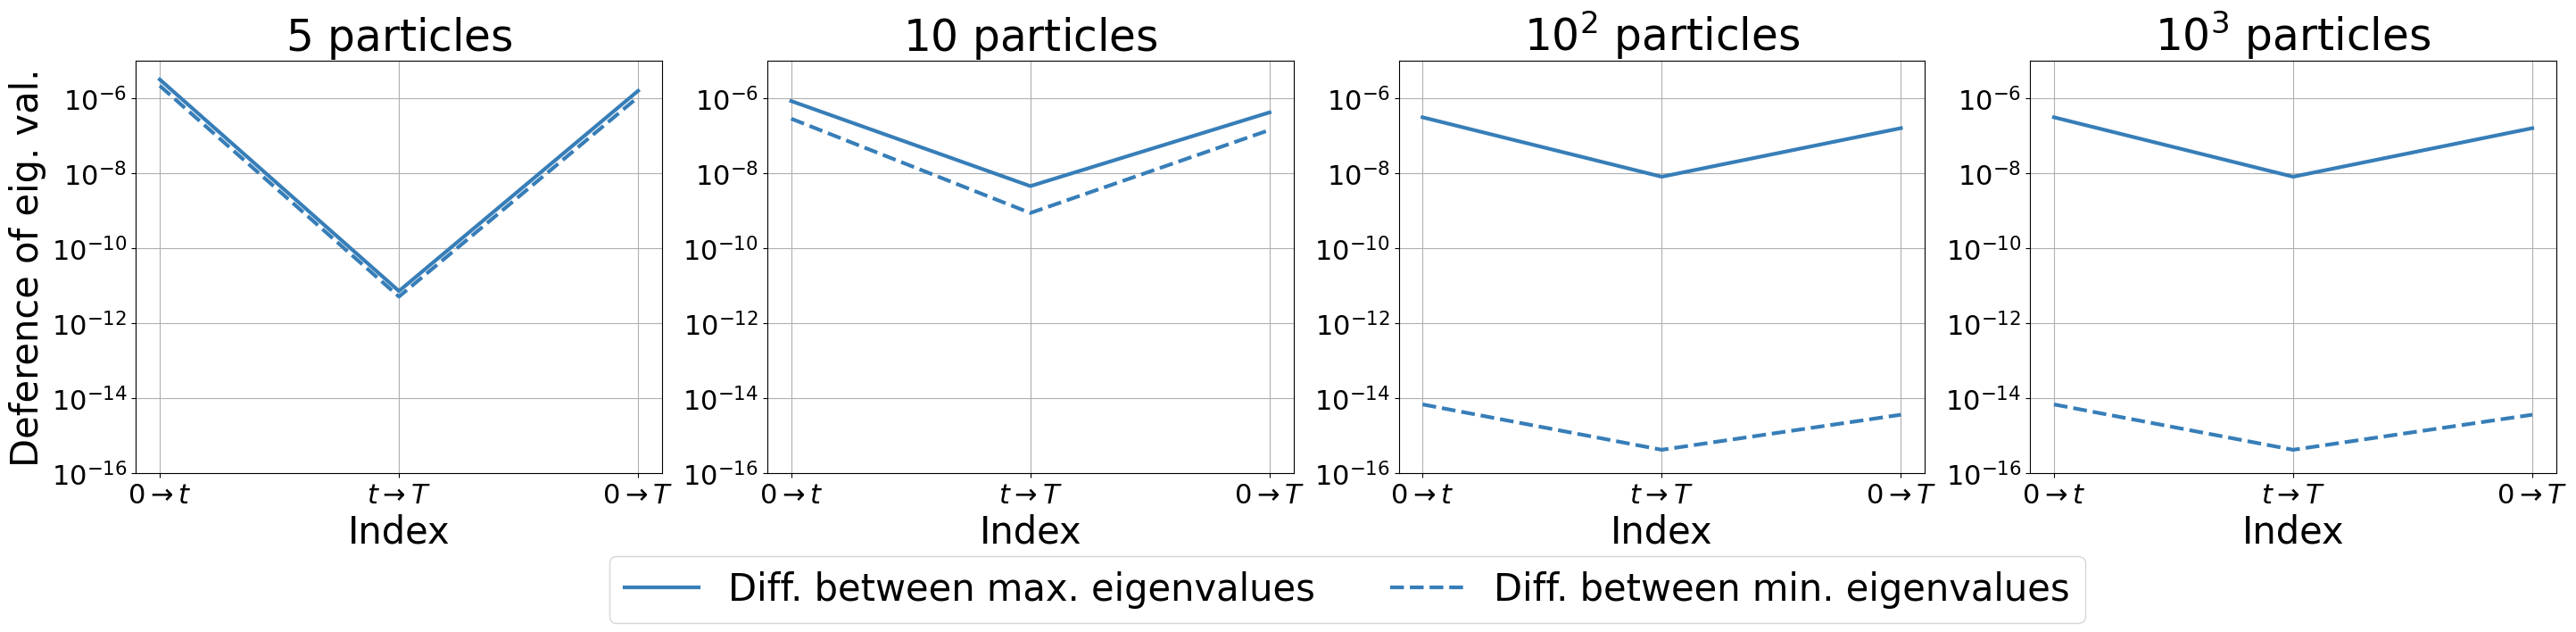

In [17]:
plt.figure(figsize=(35,6))

plt.subplot(1,4,1)
particles_list = [r'$0 \rightarrow t$', r'$t \rightarrow T$', r'$0 \rightarrow T$']
x = range(len(particles_list))
p = eig_rbf_5[0].shape

plt.plot(eig_diff(e_5),c='#377eb8', linewidth=3)
plt.plot(eig_diff(e_5_min),linestyle='--',c='#377eb8', linewidth=3)

plt.yscale('log')
#plt.xscale('log')
plt.xticks(x, particles_list, rotation=0)
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(10**-16, 10**-5)
plt.xlabel('Index',fontsize=30)
plt.ylabel('Deference of eig. val.',fontsize=30)
plt.title('$5$ particles',fontsize=35)

plt.subplot(1,4,2)
p = eig_rbf_10[0].shape


plt.plot(eig_diff(e_10),c='#377eb8', linewidth=3)
plt.plot(eig_diff(e_10_min),linestyle='--',c='#377eb8', linewidth=3)

plt.yscale('log')
#plt.xscale('log')
plt.xticks(x, particles_list, rotation=0)
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(10**-16, 10**-5)
plt.xlabel('Index',fontsize=30)
plt.title('$10$ particles',fontsize=35)

plt.subplot(1,4,3)
plt.plot(eig_diff(e_100),c='#377eb8', linewidth=3)
plt.plot(eig_diff(e_100_min),linestyle='--',c='#377eb8', linewidth=3)

plt.yscale('log')
#plt.xscale('log')
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(10**-16, 10**-5)
plt.xlabel('Index',fontsize=30)
plt.title('$10^{2}$ particles',fontsize=35)
plt.xticks(x, particles_list, rotation=0)

plt.subplot(1,4,4)
plt.plot(eig_diff(e_100),c='#377eb8', linewidth=3, label='Diff. between max. eigenvalues')
plt.plot(eig_diff(e_100_min),linestyle='--',c='#377eb8', linewidth=3, label='Diff. between min. eigenvalues')
plt.yscale('log')
#plt.xscale('log')
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xticks(x, particles_list, rotation=0)
plt.ylim(10**-16, 10**-5)
plt.xlabel('Index',fontsize=30)
plt.title('$10^{3}$ particles',fontsize=35)
plt.legend(bbox_to_anchor=(-2.7, -0.2), loc='upper left', borderaxespad=0, fontsize=30, ncol = 2)